# **Project 2**, APS1070 Winter 2023
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Mar 4, 11 PM - 13 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Manish Kumar
*   Student Number: 1009645840

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



##**Part 1: Getting started [2 Marks]**

We are going to work with a forest cover dataset: http://odds.cs.stonybrook.edu/forestcovercovertype-dataset/. This dataset contains 10 quantitative features that contain cartographic information.

Load the dataset in CSV file using Pandas. The dataset is called `vehicle_insurance.csv`. Print out the first few columns of the dataset.

* How many rows are there? `286048` **[0.1]**
* Which column contains the targets? `Anomaly` **[0.1]**
* What is the meaning of target values? `It is the variable that we want to predict using the rest of the dataset. Therefore, the target value is the value that the model is trying to predict based on a set of input features.` **[0.2]**

In [1]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import wget

wget.download('https://github.com/APS1070-W23/datasets/raw/main/forest_data_all.tar.gz','forest_data_all.tar.gz')

'forest_data_all.tar (9).gz'

In [3]:
!tar -zxvf forest_data_all.tar.gz

forest_data_all.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('forest_data_all.csv')

In [5]:
df.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Anomaly
0,2804,139,9,268,65,3180,234,238,135,6121,0
1,2785,155,18,242,118,3090,238,238,122,6211,0
2,2579,132,6,300,-15,67,230,237,140,6031,0
3,2886,151,11,371,26,5253,234,240,136,4051,0
4,2742,134,22,150,69,3215,248,224,92,6091,0


In [6]:
df_shape = df.shape
print("Shape of the Dataframe is",df_shape)
Anomaly_class1_len = len(df[df['Anomaly']==0]) # number of enteries as non-anomalous data
Anomaly_class2_len = len(df[df['Anomaly']==1]) # number of enteries as anomalous data
print("Number of entries in Non-anomalous class (Class 1) and Anomalous class (Class 2) are", Anomaly_class1_len,"and", Anomaly_class2_len,"respectively")

Shape of the Dataframe is (286048, 11)
Number of entries in Non-anomalous class (Class 1) and Anomalous class (Class 2) are 283301 and 2747 respectively


*In this project I have used `Class 1` for representing `Non-anomalous class` and `Class 2` for representing `Anomalous class`.*

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? _____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.5]**
* What metrics should we use to evaluate a model in such cases _________ **[0.2]**

**Answers**
---
1. The percentage of entries in the dataset for each class is:
    <ul>
    <li>Class '0' : 99.04%</li>
    <li>Class '1' : 0.96%</li>
    </ul>

  
2. This is considered as the 'unbalanced' data. This is the case because one class has significantly fewer instances than the other. In our dataset one class contributes to approximately 99% of the dataset and the other class contributes approximately 1% of the dataset. So, this is extremely unbalanced dataset.

3. It is extremely important in machine learning to know about the balance/unbalanced dataset. In case of unbalanced detaset, machine learning models generally tends to favor majority class and struggle to correctly classify the minority class. This happens because in case of minority class machine learning models are not exposed to enough examples to learn effective representations of that class. Knowing whether a dataset is balanced or unbalanced can help us choose appropriate algorithms and evaluation metrics to account for class imbalance. For example, evaluation metrics such as precision, recall, and F1 score may be more appropriate than accuracy when dealing with unbalanced datasets. 

  In case KNN-classifier used in the Project 1, the classifier can become biased towards the majority class. In an unbalanced dataset, the majority class examples will have a larger influence on the classification decision since they will be more likely to be among the K nearest neighbors of a new example. This can lead to poor performance of the KNN algorithm on the minority class. In addition the accuracy metric can be misleading. For example, if the majority class accuracy is high, but the minority class accuracy is low, the overall accuracy can still be high. This is highly undesirable in some scenarios and can be misleading.

4. Some of the matrices used to evaluate performance in case of unbalanced dataset are:

  <ul>
    <li>Precision: Precision is calculated as: TP / (TP + FP). It is a useful metric when the cost of false positives is high.</li>
    <li>Recall:  Recall is calculated as: TP / (TP + FN). It is a useful metric when the cost of false negatives is high.</li>
    <li>F1-score: F1-score is calculated as: 2 * ((precision * recall) / (precision + recall)). It provides a balanced measure of model performance when both precision and recall are important.</li>
    <li>AUC-ROC: AUC-ROC (Area Under Curve of Receiver Operating Characteristic curve) is a popular metric for binary classification problems. AUC-ROC ranges from 0 to 1, where higher values indicate better performance.</li>
    </ul>


In [7]:
print("Percentage of Non-anomalous class (Class 1) = {:.3f}%".format(Anomaly_class1_len/df_shape[0]*100))
print("Percentage of Anomalous class (Class 2) = {:.3f}%".format(Anomaly_class2_len/df_shape[0]*100))

Percentage of Non-anomalous class (Class 1) = 99.040%
Percentage of Anomalous class (Class 2) = 0.960%


Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [8]:
feature_data = df.loc[:, df.columns != "Anomaly"]
target_data  = df.loc[:, "Anomaly"]
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, 
                                                    test_size=0.15, 
                                                    random_state=40,
                                                    shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.2353, 
                                                    random_state=40,
                                                    shuffle=True)

Now, let's take a look at the difference in distribution for some variables between anomalous and non-anomalous forests:

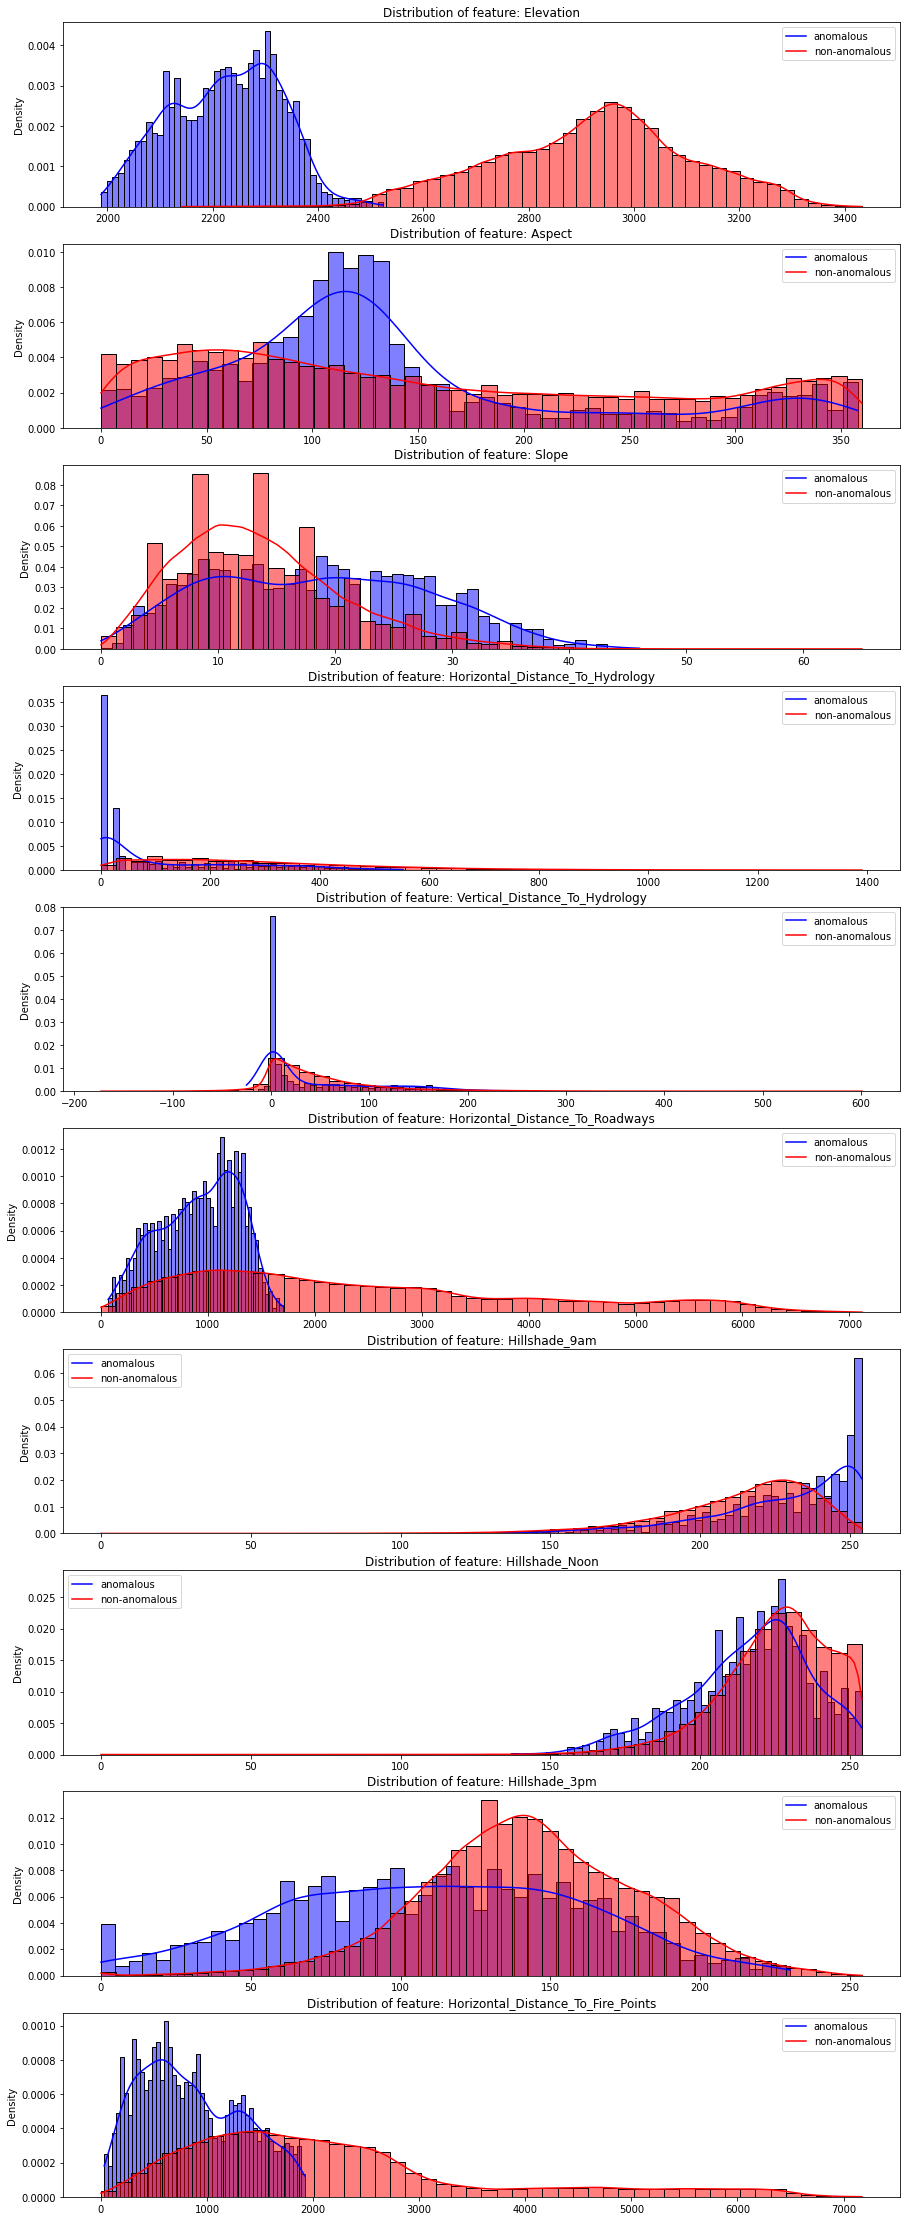

In [9]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if not 'id' in f and not 'Anomaly' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, 
                 color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, 
                 color="red", bins=50)
    ax.legend(['anomalous', 'non-anomalous'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

**Answers**

---

When plotting anomaly and non-anomaly data on the same figure, we can observe the distribution of the data points and the separation between the two groups. In the case of anomaly detection using a Gaussian model, this can provide meaningful information about the effectiveness of the model in detecting anomalies.
 
By plotting both the data on the same figure, we can visually assess the separation between the non-anomaly and anomaly data points. If the two groups are well-separated, it indicates that the Gaussian model is effective in identifying anomalies. For example, in subfigure-1 above "Distribution of feature: Elevation", the distribution of anomalous and non-anomolous data is well seperated, therefore, it indicates that the Gaussian model is effective in identifying anomalies. 

If there is a significant overlap between the non-anomaly and anomaly data points, it indicates that the Gaussian model is ineffective in identifying anomalies and the model may not be able to accurately capture the distribution of the anomaly data points. For example, refer to subfigure-2 "Distribution of feature: Aspect", the distribution of anomalous and non-anomolous data is highly overlapped, hence in this case the gaussian model is ineffective to eliminate the anomaly data points.

In summary, by plotting anomaly and non-anomaly data on the same figure, we can visually assess the effectiveness of a Gaussian model in detecting anomalies, based on the separation between the non-anomalous and anomaly data points.

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish anomalous forests from non-anomalous forests based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that forest as an anomaly. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**Answers**
 
 ---
7. The time complexity of the ternary search algorithm is O(log3 n).

  In each iteration, the ternary search algorithm reduces the search space into three sub-intervals by comparing the key with the two mid-points of the current search interval. Therefore, the algorithm divides the search space into three parts at each iteration. The search space is reduced by a factor of 1/3 at each iteration. Therefore, the number of iterations required to search for an element in the worst-case scenario is log3 n.

  *Remarks: Binary search is giving some odd results in this case, so I used ternary search. I am still figuring out this case.*

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-anomalous forests in the training set** in step 1 (instead of all the forests).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.3]**
 5. How would class imbalance affect any classifier in general (apart from just a KNN)? **[0.2]**

 **Answers**

 ---
 4. The results are `similar`. The results are similar because the proportion of anomalous data (which is less than 1%) is extremely low in our dataset. Hence the effect of these datapoints on our model is negligible.
 
 5. Class imbalance can affect any classifier in several ways:
    <ul>
    <li>Bias towards the majority class: A classifier may become biased towards the majority class. This means that the classifier may predict the majority class more frequently than the minority class, even when the minority class is the correct class.</li>
    <li>Difficulty in identifying the minority class: When the minority class has very few instances compared to the majority class, a classifier may have difficulty learning to distinguish between the two classes. This can result in poor predictive performance, where the classifier may have a high error rate on the minority class. This happens because in case of minority class machine learning models are not exposed to enough examples to learn effective representations of that class.</li>
    </ul> 
    In general, any classifier can be affected by class imbalance, and it is very important in some scenarios to address this issue in order to obtain accurate and reliable model.



In [10]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from tabulate import tabulate




## Fit a single gaussian distribution and compute AUC for each feature 
## separetely and printing the findings in a table
gmm_p2_s1 = GaussianMixture(n_components = 1, covariance_type = 'full', 
                        random_state=0)
gmm_p2_s1_sfmodels_dict = {}
auc_train_dict          = {}
auc_val_dict            = {}
p_log_train             = {}
p_log_val               = {}
table_data_2a           = []
for idx, feat in enumerate(features):
    X_train_sfvec         = X_train[feat].to_numpy().reshape(-1, 1)
    X_val_sfvec           = X_val[feat].to_numpy().reshape(-1, 1)
    x_                    = gmm_p2_s1.fit(X_train_sfvec)
    p_log_train_          = x_.score_samples(X_train_sfvec)
    p_log_val_            = x_.score_samples(X_val_sfvec)
    p_log_train[feat]     = p_log_train_
    p_log_val[feat]       = p_log_val_
    auc_train_dict[feat]  = roc_auc_score(y_train, -1*p_log_train_)
    auc_val_dict[feat]    = roc_auc_score(y_val, -1*p_log_val_)
    table_data_2a.append([idx+1, feat, auc_train_dict[feat], 
                          auc_val_dict[feat]])
 
table_headers_2a = ["Index", "Features", "AUC for training set", 
                    "AUC for validation set"]
table_2a = tabulate(table_data_2a, headers=table_headers_2a, 
                         tablefmt='fancy_grid')
print("Area under the ROC Curve on both full Training and Validation dataset:")
print(table_2a)
print('\n\n')




## Selecting best features based on AUC values of the validation set
auc_val_list_sorted       = sorted(auc_val_dict.items(), key=lambda x:x[1], reverse=True)
best_featuesNames_AUCvals = list(zip(*auc_val_list_sorted[:3]))[0] #best features based on AUC values
print("Best features based on AUC are:", best_featuesNames_AUCvals)




## Finding the optimal vaue of threshold
optimal_thresholds = {}
for idx, feat in enumerate(best_featuesNames_AUCvals):
  p_log_val_  = p_log_val[feat]
  # thresholds  = np.linspace(np.min(p_log_val_), np.max(p_log_val_), 1000)
  # f1_scores   = np.zeros(len(thresholds))
  low_  = min(p_log_val_)
  high_ = max(p_log_val_)

  while abs(low_ - high_) > 0.05:
    mid1_ = low_ + (high_ - low_)/3
    mid2_ = high_ - (high_ - low_)/3
    y_pred_mid1 = np.zeros(len(y_val))
    y_pred_mid2 = np.zeros(len(y_val))

    y_pred_mid1_     = (p_log_val_ < mid1_).astype(int)
    y_pred_mid2_     = (p_log_val_ < mid2_).astype(int)

    f1_score_mid1_ = f1_score(y_val, y_pred_mid1_, average='binary') 
    f1_score_mid2_ = f1_score(y_val, y_pred_mid2_, average='binary') 

    if f1_score_mid1_ <= f1_score_mid2_:
      low_ = mid1_  
    else:
      high_ = mid2_
    
  optimal_thresholds[feat] = mid1_

print(f"Optimal threshold: {optimal_thresholds}")
print('\n\n')



## Report Precision, Recall and F1 score on both training and validation set
## in a table using the optimal threshold values computed in previous step.
table_data_sm     = []
for idx, feat in enumerate(best_featuesNames_AUCvals):
  # For training data
  y_train_pred_    = p_log_train[feat] < optimal_thresholds[feat]
  f1_score_train_  = f1_score(y_train, y_train_pred_)
  precision_train_ = precision_score(y_train, y_train_pred_) 
  recall_train_    = recall_score(y_train, y_train_pred_)
  auc_train_       = roc_auc_score(y_train, -1*p_log_train[feat])

  # For validation data
  y_val_pred_      = p_log_val[feat] < optimal_thresholds[feat]
  f1_score_val_    = f1_score(y_val, y_val_pred_)
  precision_val_   = precision_score(y_val, y_val_pred_)
  recall_val_      = recall_score(y_val, y_val_pred_)
  auc_val_         = roc_auc_score(y_val, -1*p_log_val[feat])

  table_data_sm.append([feat, optimal_thresholds[feat], 
                        auc_train_.round(5), auc_val_.round(5),
                        f1_score_train_.round(5), f1_score_val_.round(5),
                        precision_train_.round(5), precision_val_.round(5),
                        recall_train_.round(5), recall_val_.round(5)])

table_headers_sm  = ["Feature", "Optimal thresholds",
                     "AUC (Train)", "AUC (Valid)",
                     "F1 score (Train)", "F1 score (Valid)",
                     "Precision (Train)", "Precision (Valid)",
                     "Recall (Train)", "Recall (Valid)"]
table_sm = tabulate(table_data_sm, headers=table_headers_sm, 
                         tablefmt='fancy_grid')

print("F1 score, Precision, and Recall on both training and validation set using the optimal threshold:")
print(table_sm)
print('\n\n')

Area under the ROC Curve on both full Training and Validation dataset:
╒═════════╤════════════════════════════════════╤════════════════════════╤══════════════════════════╕
│   Index │ Features                           │   AUC for training set │   AUC for validation set │
╞═════════╪════════════════════════════════════╪════════════════════════╪══════════════════════════╡
│       1 │ Elevation                          │               0.999356 │                 0.999233 │
├─────────┼────────────────────────────────────┼────────────────────────┼──────────────────────────┤
│       2 │ Aspect                             │               0.378535 │                 0.359695 │
├─────────┼────────────────────────────────────┼────────────────────────┼──────────────────────────┤
│       3 │ Slope                              │               0.64524  │                 0.648386 │
├─────────┼────────────────────────────────────┼────────────────────────┼──────────────────────────┤
│       4 │ Horizont

In [11]:
## Fit a single gaussian distribution and compute AUC, F1 score, Precision and
## Recall for each feature separetely by fit a Gaussian only on non-anomalous 
## forests in the training set(instead of all the forests).
gmm_p2_s2 = GaussianMixture(n_components = 1, covariance_type = 'full', 
                        random_state=0)
p_log_train_2b              = {}
p_log_val_2b                = {}
table_data_2b               = []
for idx, feat in enumerate(best_featuesNames_AUCvals):
    X_train_sfvec       = X_train[feat].to_numpy().reshape(-1, 1)
    X_val_sfvec         = X_val[feat].to_numpy().reshape(-1, 1)
    X_train_sfvec_nA    = X_train[feat][y_train == 0].to_numpy().reshape(-1, 1) 
    x_nA                = gmm_p2_s2.fit(X_train_sfvec_nA) # training only on non-anomalous data

    # For training data
    p_log_train_        = x_nA.score_samples(X_train_sfvec)
    y_train_pred        = p_log_train_ < optimal_thresholds[feat]
    auc_train_          = roc_auc_score(y_train, -1*p_log_train_)
    precision_train_    = precision_score(y_train, y_train_pred) 
    recall_train_       = recall_score(y_train, y_train_pred)    
    f1_score_train_     = f1_score(y_train, y_train_pred)
    
    # For validation data
    p_log_val_          = x_nA.score_samples(X_val_sfvec)
    y_val_pred          = p_log_val_ < optimal_thresholds[feat]
    auc_val_            = roc_auc_score(y_val, -1*p_log_val_)
    precision_val_      = precision_score(y_val, y_val_pred)
    recall_val_         = recall_score(y_val, y_val_pred)
    f1_score_val_       = f1_score(y_val, y_val_pred)
    
    table_data_2b.append([feat, optimal_thresholds[feat], 
                        auc_train_.round(5), auc_val_.round(5),
                        f1_score_train_.round(5), f1_score_val_.round(5),
                        precision_train_.round(5), precision_val_.round(5),
                        recall_train_.round(5), recall_val_.round(5)])
 
table_headers_2b = ["Feature", "Optimal thresholds",
                    "AUC (Train)", "AUC (Valid)",
                    "F1 score (Train)", "F1 score (Valid)",
                    "Precision (Train)", "Precision (Valid)",
                    "Recall (Train)", "Recall (Valid)"]
table_2b = tabulate(table_data_2b, headers=table_headers_2b, 
                         tablefmt='fancy_grid')
print("F1 score, Precision, and Recall on both training and validation set using the optimal threshold (training using only on non-anomalous):")
print(table_2b)

F1 score, Precision, and Recall on both training and validation set using the optimal threshold (training using only on non-anomalous):
╒════════════════════════════════════╤══════════════════════╤═══════════════╤═══════════════╤════════════════════╤════════════════════╤═════════════════════╤═════════════════════╤══════════════════╤══════════════════╕
│ Feature                            │   Optimal thresholds │   AUC (Train) │   AUC (Valid) │   F1 score (Train) │   F1 score (Valid) │   Precision (Train) │   Precision (Valid) │   Recall (Train) │   Recall (Valid) │
╞════════════════════════════════════╪══════════════════════╪═══════════════╪═══════════════╪════════════════════╪════════════════════╪═════════════════════╪═════════════════════╪══════════════════╪══════════════════╡
│ Elevation                          │             -9.91275 │       0.99937 │       0.99924 │            0.87397 │            0.87061 │             0.78843 │             0.77969 │          0.98033 │          0.

In [12]:
## Comparison of results from parts 2a and 2b
table1_data_ = table_data_sm
table2_data_ = table_data_2b

table1_AUCdata = []
table2_F1score = []
table3_Precision = []
table4_Recall = []

# Separating table values for comparision
for idx in range(3):
  dum_1_ = table1_data_[idx]
  dum_2_ = table2_data_[idx]
  # table data order [feature] [score 2a train] [score 2b train] [score 2a val] [score 2b val]
  table1_AUCdata.append([dum_1_[0], dum_1_[2], dum_2_[2], dum_1_[3], dum_2_[3]])
  table2_F1score.append([dum_1_[0], dum_1_[4], dum_2_[4], dum_1_[5], dum_2_[5]])
  table3_Precision.append([dum_1_[0], dum_1_[6], dum_2_[6], dum_1_[7], dum_2_[7]])
  table4_Recall.append([dum_1_[0], dum_1_[8], dum_2_[8], dum_1_[9], dum_2_[9]])


# AUC comparison
print("Comparison of AUC between models from section 2a and section 2b:")
table_AUCdata_header_ = ["Feature", "AUC (Train)\n(section 2a)", "AUC (Train)\n(section 2b)", "AUC (Valid)\n(section 2a)", "AUC (Valid)\n(section 2b)"]
table_AUC = tabulate(table1_AUCdata, headers=table_AUCdata_header_, 
                         tablefmt='fancy_grid', colalign=("left","left","left","left","left"))
print(table_AUC)
print("\n\n")

# F1 score comparison
print("Comparison of F1 score between models from section 2a and section 2b:")
table_F1data_header_ = ["Feature", "F1 score (Train)\n(section 2a)", "F1 score (Train)\n(section 2b)", "F1 score (Valid)\n(section 2a)", "F1 score (Valid)\n(section 2b)"]
table_F1 = tabulate(table2_F1score, headers=table_F1data_header_, 
                         tablefmt='fancy_grid', colalign=("left","left","left","left","left"))
print(table_F1)
print("\n\n")


# Precision comparision
print("Comparison of Precision between models from section 2a and section 2b:")
table_Precisiondata_header_ = ["Feature", "Precision (Train)\n(section 2a)", "Precision (Train)\n(section 2b)", "Precision (Valid)\n(section 2a)", "Precision (Valid)\n(section 2b)"]
table_Precision = tabulate(table3_Precision, headers=table_Precisiondata_header_, 
                         tablefmt='fancy_grid', colalign=("left","left","left","left","left"))
print(table_Precision)
print("\n\n")


# Recall comparision
print("Comparison of Recall between models from section 2a and section 2b:")
table_Recalldata_header_ = ["Feature", "Recall (Train)\n(section 2a)", "Recall (Train)\n(section 2b)", "Recall (Valid)\n(section 2a)", "Recall (Valid)\n(section 2b)"]
table_Recall = tabulate(table3_Precision, headers=table_Recalldata_header_, 
                         tablefmt='fancy_grid', colalign=("left","left","left","left","left"))
print(table_Recall)
print("\n\n")



Comparison of AUC between models from section 2a and section 2b:
╒════════════════════════════════════╤════════════════╤════════════════╤════════════════╤════════════════╕
│ Feature                            │ AUC (Train)    │ AUC (Train)    │ AUC (Valid)    │ AUC (Valid)    │
│                                    │ (section 2a)   │ (section 2b)   │ (section 2a)   │ (section 2b)   │
╞════════════════════════════════════╪════════════════╪════════════════╪════════════════╪════════════════╡
│ Elevation                          │ 0.99936        │ 0.99937        │ 0.99923        │ 0.99924        │
├────────────────────────────────────┼────────────────┼────────────────┼────────────────┼────────────────┤
│ Horizontal_Distance_To_Fire_Points │ 0.6736         │ 0.67583        │ 0.66176        │ 0.66407        │
├────────────────────────────────────┼────────────────┼────────────────┼────────────────┼────────────────┤
│ Hillshade_3pm                      │ 0.66475        │ 0.66557        │ 0.6500

## **Part 3: One Gaussian model with multiple features: [2 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-anomalous blue and anomalous red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on non-anomalous forests). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**




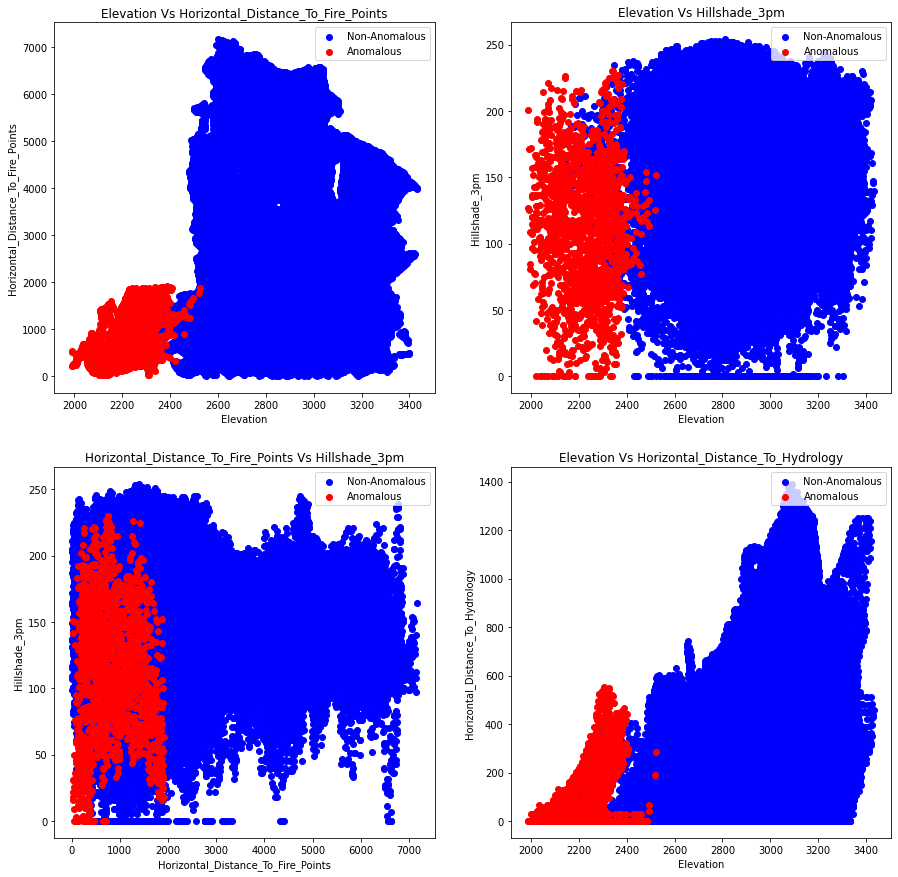

In [13]:
plot_features = []
plot_features.append(['Elevation', 'Horizontal_Distance_To_Fire_Points'])
plot_features.append(['Elevation', 'Hillshade_3pm'])
plot_features.append(['Horizontal_Distance_To_Fire_Points', 'Hillshade_3pm'])
plot_features.append(['Elevation', 'Horizontal_Distance_To_Hydrology'])

colors = ['blue', 'red']
fig1, (ax1) = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

ax = [ax1[0,0], ax1[0,1], ax1[1,0], ax1[1,1]]

for idx, feats in enumerate(plot_features):
  f1_   = feats[0]
  f2_   = feats[1]
  x_nA_ = X_train[f1_][y_train==0] # non-anomalous
  x_A_  = X_train[f1_][y_train==1] # anomalous
  y_nA_ = X_train[f2_][y_train==0] # non-anomalous
  y_A_  = X_train[f2_][y_train==1] # anomalous
  ax[idx].scatter(x_nA_, y_nA_, color=colors[0], label='Non-Anomalous') # non-anomalous blue color
  ax[idx].scatter(x_A_, y_A_, color=colors[1], label='Anomalous') # anomalous red color
  ax[idx].legend(loc='upper right')
  ax[idx].set_xlabel(f1_)
  ax[idx].set_ylabel(f2_)
  ax[idx].title.set_text(f1_ + " Vs " + f2_)

fig1.show()

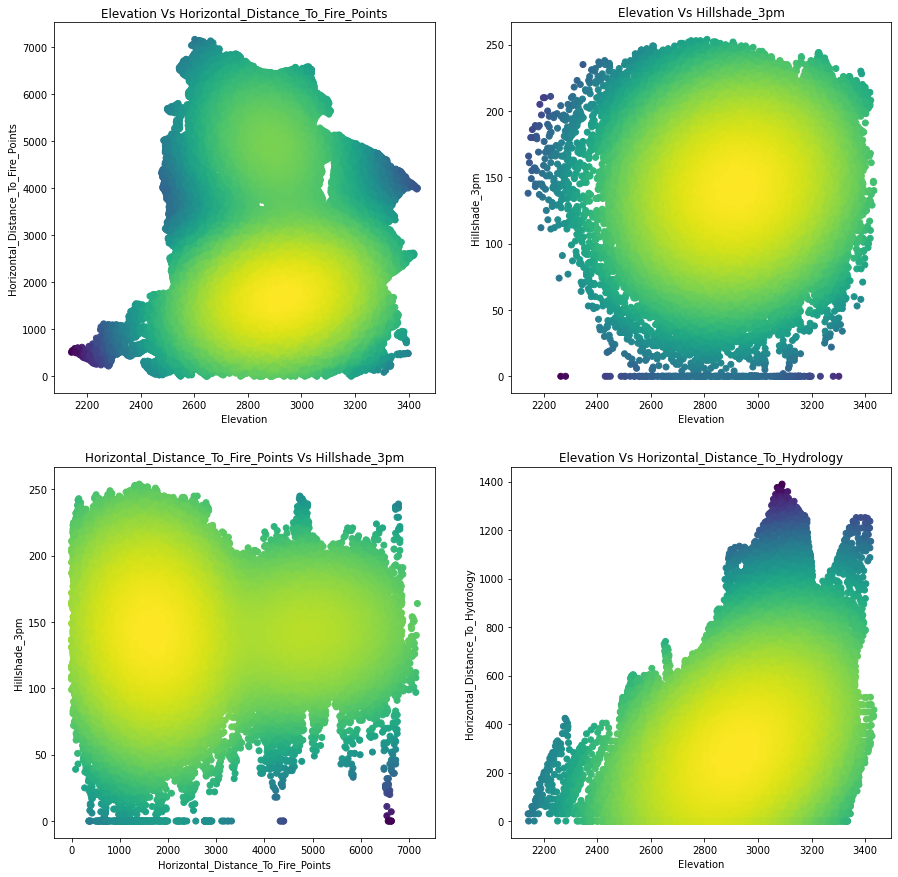

In [14]:
## Plotting to check number of n_components required for gaussians mixture model
n_comp_visual = [2, 1, 2, 1] #guess and check the plots

auc_train_mf_dict   = {}
auc_val_mf_dict     = {}
p_log_val_mf        = {}
p_log_train_mf      = {}
table_data_3        = []

fig2, (ax1) = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax = [ax1[0,0], ax1[0,1], ax1[1,0], ax1[1,1]]

for idx, feats in enumerate(plot_features):
  f1_   = feats[0]
  f2_   = feats[1]
  x_nA_ = X_train[f1_][y_train==0] # non-anomalous
  y_nA_ = X_train[f2_][y_train==0] # non-anomalous

  X_train_mfvec_        = X_train[feats][y_train==0].to_numpy()
  gmm_p3_s1_            = GaussianMixture(n_components = n_comp_visual[idx],
                                 random_state=0)
  x_                    = gmm_p3_s1_.fit(X_train_mfvec_) 
  p_log_train_          = x_.score_samples(X_train_mfvec_)

  ax[idx].scatter(x_nA_, y_nA_, c=p_log_train_, cmap='viridis')
  ax[idx].set_xlabel(f1_)
  ax[idx].set_ylabel(f2_)
  ax[idx].title.set_text(f1_ + " Vs " + f2_)

fig2.show()

In [15]:
n_comp_visual = [2, 1, 2, 1] # number of n_components chosen to fit best 4 models in order


auc_train_mf_dict   = {}
auc_val_mf_dict     = {}
p_log_val_mf        = {}
p_log_train_mf      = {}
table_data_3        = []
for idx, feats in enumerate(plot_features):
  X_train_mfvec         = X_train[feats].to_numpy()
  X_val_mfvec           = X_val[feats].to_numpy()
  gmm_p3_s1_            = GaussianMixture(n_components = n_comp_visual[idx],
                                 random_state=0)
  x_                    = gmm_p3_s1_.fit(X_train_mfvec) 
  p_log_train_          = x_.score_samples(X_train_mfvec)
  p_log_val_            = x_.score_samples(X_val_mfvec)
  p_log_train_mf[idx]     = p_log_train_
  p_log_val_mf[idx]       = p_log_val_
  auc_train_mf_             = roc_auc_score(y_train, -1*p_log_train_)
  auc_val_mf_               = roc_auc_score(y_val, -1*p_log_val_)
  table_data_3.append([idx+1, feats, auc_train_mf_, auc_val_mf_])
 
table_headers_3 = ["Index", "Features", "AUC for training set", 
                    "AUC for validation set"]
table_3 = tabulate(table_data_3, headers=table_headers_3, 
                         tablefmt='fancy_grid')
print("Area under the ROC Curve on both full Training and Validation dataset:")
print(table_3)
print('\n\n')



## Set with highest AUC 
idx_maxAUC_mf = 1
set_max_AUC   = plot_features[idx_maxAUC_mf]
print('Set with max AUC:', set_max_AUC)

## Finding the optimal vaue of threshold
optimal_thresholds_mf = {}
p_log_val_mf_         = p_log_val_mf[idx_maxAUC_mf] 

low_  = min(p_log_val_mf_)
high_ = max(p_log_val_mf_)

while abs(low_ - high_) > 0.05:
  mid1_ = low_ + (high_ - low_)/3
  mid2_ = high_ - (high_ - low_)/3
  y_pred_mid1 = np.zeros(len(y_val))
  y_pred_mid2 = np.zeros(len(y_val))

  y_pred_mid1_     = (p_log_val_mf_ < mid1_).astype(int)
  y_pred_mid2_     = (p_log_val_mf_ < mid2_).astype(int)

  f1_score_mid1_ = f1_score(y_val, y_pred_mid1_, average='binary') 
  f1_score_mid2_ = f1_score(y_val, y_pred_mid2_, average='binary') 

  if f1_score_mid1_ <= f1_score_mid2_:
    low_ = mid1_  
  else:
    high_ = mid2_
optimal_thresholds_mf = mid1_

print(f"Optimal threshold: {optimal_thresholds_mf}")

Area under the ROC Curve on both full Training and Validation dataset:
╒═════════╤═════════════════════════════════════════════════════════╤════════════════════════╤══════════════════════════╕
│   Index │ Features                                                │   AUC for training set │   AUC for validation set │
╞═════════╪═════════════════════════════════════════════════════════╪════════════════════════╪══════════════════════════╡
│       1 │ ['Elevation', 'Horizontal_Distance_To_Fire_Points']     │               0.994862 │                 0.99499  │
├─────────┼─────────────────────────────────────────────────────────┼────────────────────────┼──────────────────────────┤
│       2 │ ['Elevation', 'Hillshade_3pm']                          │               0.99574  │                 0.995678 │
├─────────┼─────────────────────────────────────────────────────────┼────────────────────────┼──────────────────────────┤
│       3 │ ['Horizontal_Distance_To_Fire_Points', 'Hillshade_3pm'] │      

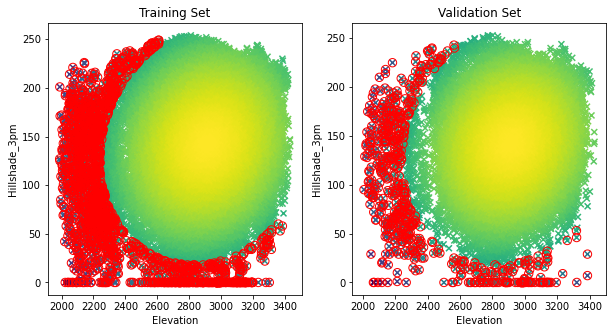

In [16]:
## Plot two seperate figures (for the training and validation data) and put a 
## circle around outliers based on your threshold
fig3, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=([10,5]))

f1_       = set_max_AUC[0]
f2_       = set_max_AUC[1]

X_train_mfvec_   = X_train[[f1_,f2_]].to_numpy()
X_val_mfvec_     = X_val[[f1_,f2_]].to_numpy()
gmm_p3_s3_       = GaussianMixture(n_components = n_comp_visual[idx_maxAUC_mf],
                                random_state=0)
x_               = gmm_p3_s3_.fit(X_train_mfvec_) 
p_log_train_     = x_.score_samples(X_train_mfvec_)
p_log_val_       = x_.score_samples(X_val_mfvec_)

ax1.scatter(X_train_mfvec_[:,0], X_train_mfvec_[:,1], marker="x", c=p_log_train_, cmap='viridis')
# Circling of anomalies
outliers = np.nonzero(p_log_train_<optimal_thresholds_mf)[0]
ax1.scatter(X_train_mfvec_[outliers,0],X_train_mfvec_[outliers,1],marker="o",
            facecolor="none",edgecolor="r",s=70);
ax1.set_xlabel(f1_)
ax1.set_ylabel(f2_)
ax1.title.set_text('Training Set')

ax2.scatter(X_val_mfvec_[:,0], X_val_mfvec_[:,1], marker="x", c=p_log_val_, cmap='viridis')
# Circling of anomalies
outliers = np.nonzero(p_log_val_<optimal_thresholds_mf)[0]
ax2.scatter(X_val_mfvec_[outliers,0],X_val_mfvec_[outliers,1],marker="o",
            facecolor="none",edgecolor="r",s=70);
ax2.set_xlabel(f1_)
ax2.set_ylabel(f2_)
ax2.title.set_text('Validation Set')

fig3.show()

## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for anomalous and non-anomalous forests.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-anomalous forests** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **anomalous forests** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the forest is classified as anomalous. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the forest is anomalous (the forest belongs to the $G_2$ distribution which represents anomalous forests). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model? Why? **[0.5]**


  **Answers**

  ---
6. No, we cannot report AUC for this model because the model is using a threshold-based binary classification approach, which means it is not producing a probability score for each sample that can be used to compute the AUC. To compute the AUC, we need to have a range of classification thresholds and the corresponding true positive rates and false positive rates at each threshold. However, in this model, we are using a fixed threshold (c × S2) to classify the samples as anomalous or non-anomalous. Therefore, we cannot compute the ROC curve or the AUC.

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from tabulate import tabulate



## Fit a Gaussian distribution ( G1 ) on a feature of non-anomalous forests 
gmm_1_p4_s1 = GaussianMixture(n_components = 1, covariance_type = 'full', 
                        random_state=0) # for non-anomalous data
gmm_1_p4_s2 = GaussianMixture(n_components = 1, covariance_type = 'full', 
                        random_state=0) # for anomalous data

c_infer                   = np.arange(0,3,0.1)
results_dict              = {}
table_data_4              = []
for idx, feat in enumerate(features):
    X_train_sfvec             = X_train[feat].to_numpy().reshape(-1, 1)
    X_val_sfvec               = X_val[feat].to_numpy().reshape(-1, 1)
    X_train_sfvec_nA          = X_train[feat][y_train==0].to_numpy().reshape(-1, 1)
    X_train_sfvec_A           = X_train[feat][y_train==1].to_numpy().reshape(-1, 1)
    G1                        = gmm_1_p4_s1.fit(X_train_sfvec_nA) 
    G2                        = gmm_1_p4_s2.fit(X_train_sfvec_A)  
    S1_train                  = G1.score_samples(X_train_sfvec)
    S2_train                  = G2.score_samples(X_train_sfvec)
    S1_val                    = G1.score_samples(X_val_sfvec)
    S2_val                    = G2.score_samples(X_val_sfvec)

    # Find optimal c that maximizes F1 score on validation set
    f1_scores = []
    for c in c_infer:
        y_pred = (S1_val<c*S2_val).astype(int)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)
        
    # Find best F1 score, Precision and Recall and optimal c for the feature
    max_f1_idx          = np.argmax(f1_scores)
    best_c_             = c_infer[max_f1_idx]

    # For training set
    y_pred_train        = (S1_train<best_c_*S2_train).astype(int)
    best_f1_train_      = f1_score(y_train, y_pred_train)
    precision_train_    = precision_score(y_train, y_pred_train)
    recall_train_       = recall_score(y_train, y_pred_train)    
    
    # For validation set
    y_pred_val          = (S1_val<best_c_*S2_val).astype(int)
    best_f1_val_        = f1_score(y_val, y_pred_val)
    precision_val_      = precision_score(y_val, y_pred_val)
    recall_val_         = recall_score(y_val, y_pred_val)    

    results_dict[feat]  = [{'Best c': best_c_,
                            'Training Set':{'Best F1 score': best_f1_train_,
                                            'Best Precision': precision_train_,
                                            'Best Recall': recall_train_},
                            'Validation Set':{'Best F1 score': best_f1_val_,
                                              'Best Precision': precision_val_,
                                              'Best Recall': recall_val_}}]
    table_data_4.append([feat, best_c_, best_f1_train_, best_f1_val_,
                          precision_train_, precision_val_,
                          recall_train_, recall_val_])

table_headers_4 = ["Feature","Best c", "F1 score (Train)", "F1 score (Valid)", 
                   "Precision (Train)", "Precision (Valid)",
                   "Recall (Train)", "Recall (Valid)"]
table_4 = tabulate(table_data_4, headers=table_headers_4, 
                         tablefmt='fancy_grid')
print(table_4)

╒════════════════════════════════════╤══════════╤════════════════════╤════════════════════╤═════════════════════╤═════════════════════╤══════════════════╤══════════════════╕
│ Feature                            │   Best c │   F1 score (Train) │   F1 score (Valid) │   Precision (Train) │   Precision (Valid) │   Recall (Train) │   Recall (Valid) │
╞════════════════════════════════════╪══════════╪════════════════════╪════════════════════╪═════════════════════╪═════════════════════╪══════════════════╪══════════════════╡
│ Elevation                          │      1.6 │          0.883733  │          0.875421  │           0.832175  │           0.818898  │         0.942102 │         0.940325 │
├────────────────────────────────────┼──────────┼────────────────────┼────────────────────┼─────────────────────┼─────────────────────┼──────────────────┼──────────────────┤
│ Aspect                             │      1   │          0.022733  │          0.023574  │           0.011527  │           0.0119

## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-anomalous forests or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid forests and multiple components for anomalous ones! Why does it make sense to have multiple components for the anomalous forests?

In [18]:
def twoGaussian_multiFeature(feat, n_comp_val_s1, n_comp_val_s2):

  gmm_1_p5_s1 = GaussianMixture(n_components = n_comp_val_s1, covariance_type = 'full', 
                          random_state=0) # for non-anomalous data
  gmm_1_p5_s2 = GaussianMixture(n_components = n_comp_val_s2, covariance_type = 'full', 
                          random_state=0) # for anomalous data
  c_infer                   = np.arange(0,3,0.1)
  results_dict              = {}
  table_data_               = []
  n_Com_G1                  = n_comp_val_s1
  n_Com_G2                  = n_comp_val_s2
  if len(feat) == 1:
    X_train_sfvec             = X_train[feat].to_numpy().reshape(-1, 1)
    X_val_sfvec               = X_val[feat].to_numpy().reshape(-1, 1)
    X_train_sfvec_nA          = X_train[feat][y_train==0].to_numpy().reshape(-1, 1)
    X_train_sfvec_A           = X_train[feat][y_train==1].to_numpy().reshape(-1, 1)
  else:
    X_train_sfvec             = X_train[feat].to_numpy()
    X_val_sfvec               = X_val[feat].to_numpy()
    X_train_sfvec_nA          = X_train[feat][y_train==0].to_numpy()
    X_train_sfvec_A           = X_train[feat][y_train==1].to_numpy()

  G1                        = gmm_1_p5_s1.fit(X_train_sfvec_nA) # training only on non-anomalous data
  G2                        = gmm_1_p5_s2.fit(X_train_sfvec_A)  # training only on anomalous data
  S1_train                  = G1.score_samples(X_train_sfvec)
  S2_train                  = G2.score_samples(X_train_sfvec)
  S1_val                    = G1.score_samples(X_val_sfvec)
  S2_val                    = G2.score_samples(X_val_sfvec)

  # Find optimal c that maximizes F1 score on validation set
  f1_scores = []
  for c in c_infer:
      y_pred = (S1_val<c*S2_val).astype(int)
      f1 = f1_score(y_val, y_pred)
      f1_scores.append(f1)
  # Find best F1 score, Precision and Recall and optimal c for the feature
  max_f1_idx          = np.argmax(f1_scores)
  best_c_             = c_infer[max_f1_idx]

  # For training set
  y_pred_train        = (S1_train<best_c_*S2_train).astype(int)
  best_f1_train_      = f1_score(y_train, y_pred_train)
  precision_train_    = precision_score(y_train, y_pred_train)
  recall_train_       = recall_score(y_train, y_pred_train)    
  
  # For validation set
  y_pred_val          = (S1_val<best_c_*S2_val).astype(int)
  best_f1_val_        = f1_score(y_val, y_pred_val)
  precision_val_      = precision_score(y_val, y_pred_val)
  recall_val_         = recall_score(y_val, y_pred_val)    
 
  return [feat, n_Com_G1,  n_Com_G2, best_c_, 
                      best_f1_train_, best_f1_val_,
                      precision_train_, precision_val_,
                      recall_train_, recall_val_,
                      0, 0]



In [19]:
def oneGaussian_multiFeature(feat, n_comp_val):
  gmm_1_p5_s3 = GaussianMixture(n_components = n_comp_val, covariance_type = 'full', 
                          random_state=0)
  
  table_data_ = []
  p_log_train_ = []
  p_log_val_ = []

  if len(feat) == 1:
    X_train_sfvec             = X_train[feat].to_numpy().reshape(-1, 1)
    X_val_sfvec               = X_val[feat].to_numpy().reshape(-1, 1)
    X_train_sfvec_nA          = X_train[feat][y_train==0].to_numpy().reshape(-1, 1)
    X_train_sfvec_A           = X_train[feat][y_train==1].to_numpy().reshape(-1, 1)
  else:
    X_train_sfvec             = X_train[feat].to_numpy()
    X_val_sfvec               = X_val[feat].to_numpy()
    X_train_sfvec_nA          = X_train[feat][y_train==0].to_numpy()
    X_train_sfvec_A           = X_train[feat][y_train==1].to_numpy()

  x_                  = gmm_1_p5_s3.fit(X_train_sfvec)
  p_log_train_        = x_.score_samples(X_train_sfvec)
  p_log_val_          = x_.score_samples(X_val_sfvec)

  ## Finding the optimal vaue of threshold
  low_  = min(p_log_val_)
  high_ = max(p_log_val_)

  while abs(low_ - high_) > 0.05:
    mid1_ = low_ + (high_ - low_)/3
    mid2_ = high_ - (high_ - low_)/3
    y_pred_mid1 = np.zeros(len(y_val))
    y_pred_mid2 = np.zeros(len(y_val))

    y_pred_mid1_     = (p_log_val_ < mid1_).astype(int)
    y_pred_mid2_     = (p_log_val_ < mid2_).astype(int)

    f1_score_mid1_ = f1_score(y_val, y_pred_mid1_, average='binary') 
    f1_score_mid2_ = f1_score(y_val, y_pred_mid2_, average='binary') 

    if f1_score_mid1_ <= f1_score_mid2_:
      low_ = mid1_  
    else:
      high_ = mid2_
    optimal_thresh = mid1_


    # For training data
    y_train_pred        = p_log_train_ < optimal_thresh
    auc_train_          = roc_auc_score(y_train, -1*p_log_train_)
    precision_train_    = precision_score(y_train, y_train_pred) 
    recall_train_       = recall_score(y_train, y_train_pred)    
    f1_score_train_     = f1_score(y_train, y_train_pred)
    
    # For validation data
    y_val_pred          = p_log_val_ < optimal_thresh
    auc_val_            = roc_auc_score(y_val, -1*p_log_val_)
    precision_val_      = precision_score(y_val, y_val_pred)
    recall_val_         = recall_score(y_val, y_val_pred)
    f1_score_val_       = f1_score(y_val, y_val_pred)
    
    return [feat, n_comp_val, optimal_thresh, 
                        f1_score_train_.round(5), f1_score_val_.round(5),
                        precision_train_.round(5), precision_val_.round(5),
                        recall_train_.round(5), recall_val_.round(5),
                        auc_train_.round(5), auc_val_.round(5)]
  


In [20]:
## Initializing table paprameter required for printing
feat_sorted_AUC   = list(zip(*auc_val_list_sorted[:]))[0] #features based on AUC values sorted from section 2

table_hdrs_twoGs = ["Features", "G1 n_components", "G2 n_components","Best c",
                    "F1 score (Train)", "F1 score (Valid)", 
                    "Precision (Train)", "Precision (Valid)",
                    "Recall (Train)", "Recall (Valid)",
                    "AUC (Train)", "AUC (Val)"]

table_hdrs_oneGs = ["Features", "n_components","Threshhold",
                    "F1 score (Train)", "F1 score (Valid)", 
                    "Precision (Train)", "Precision (Valid)",
                    "Recall (Train)", "Recall (Valid)",
                    "AUC (Train)", "AUC (Val)"]

In [21]:
## For single feature using two gaussian model
table_p5_        = []
for idx in range(1,3):
  for jdx in range(1,5):
    table_p5_.append(twoGaussian_multiFeature([feat_sorted_AUC[0]], idx, jdx))


table_5_print = tabulate(table_p5_, headers=table_hdrs_twoGs, 
                        tablefmt='fancy_grid')

print('For single feature using two gaussian model: ')
print(table_5_print)
print("\n\n")



## For two feature using two gaussian model
table_p5_        = []
table_p5_1_dict   = {}
table_p5_2_dict   = {}
for idx in range(1,3):
  for jdx in range(1,5):
    table_p5_.append(twoGaussian_multiFeature([feat_sorted_AUC[0], 
                                               feat_sorted_AUC[1]], idx, jdx))

table_5_print = tabulate(table_p5_, headers=table_hdrs_twoGs, 
                        tablefmt='fancy_grid')

print('For two features using two gaussian model: ')
print(table_5_print)
print("\n\n")



## For three feature using two gaussian model
table_p5_        = []
table_p5_1_dict   = {}
table_p5_2_dict   = {}
for idx in range(1,3):
  for jdx in range(1,5):
    table_p5_.append(twoGaussian_multiFeature([feat_sorted_AUC[0], 
                                               feat_sorted_AUC[1],
                                               feat_sorted_AUC[2]], idx, jdx))

table_5_print = tabulate(table_p5_, headers=table_hdrs_twoGs, 
                        tablefmt='fancy_grid')

print('For three features using two gaussian model: ')
print(table_5_print)
print("\n\n")



## For four feature using two gaussian model
table_p5_        = []
table_p5_1_dict   = {}
table_p5_2_dict   = {}
for idx in range(1,3):
  for jdx in range(1,5):
    table_p5_.append(twoGaussian_multiFeature([feat_sorted_AUC[0], 
                                               feat_sorted_AUC[1],
                                               feat_sorted_AUC[2],
                                               feat_sorted_AUC[3]], idx, jdx))

table_5_print = tabulate(table_p5_, headers=table_hdrs_twoGs, 
                        tablefmt='fancy_grid')

print('For four features using two gaussian model: ')
print(table_5_print)
print("\n\n")



## For five feature using two gaussian model
table_p5_        = []
table_p5_1_dict   = {}
table_p5_2_dict   = {}
for idx in range(1,3):
  for jdx in range(1,5):
    table_p5_.append(twoGaussian_multiFeature([feat_sorted_AUC[0], 
                                               feat_sorted_AUC[1],
                                               feat_sorted_AUC[2],
                                               feat_sorted_AUC[3],
                                               feat_sorted_AUC[4]], idx, jdx))

table_5_print = tabulate(table_p5_, headers=table_hdrs_twoGs, 
                        tablefmt='fancy_grid')

print('For five features using two gaussian model: ')
print(table_5_print)
print("\n\n")



## For six feature using two gaussian model
table_p5_        = []
table_p5_1_dict   = {}
table_p5_2_dict   = {}
for idx in range(1,3):
  for jdx in range(1,5):
    table_p5_.append(twoGaussian_multiFeature([feat_sorted_AUC[0], 
                                               feat_sorted_AUC[1],
                                               feat_sorted_AUC[2],
                                               feat_sorted_AUC[3],
                                               feat_sorted_AUC[4]], idx, jdx))

table_5_print = tabulate(table_p5_, headers=table_hdrs_twoGs, 
                        tablefmt='fancy_grid')

print('For six features using two gaussian model: ')
print(table_5_print)
print("\n\n")

For single feature using two gaussian model: 
╒═══════════════╤═══════════════════╤═══════════════════╤══════════╤════════════════════╤════════════════════╤═════════════════════╤═════════════════════╤══════════════════╤══════════════════╤═══════════════╤═════════════╕
│ Features      │   G1 n_components │   G2 n_components │   Best c │   F1 score (Train) │   F1 score (Valid) │   Precision (Train) │   Precision (Valid) │   Recall (Train) │   Recall (Valid) │   AUC (Train) │   AUC (Val) │
╞═══════════════╪═══════════════════╪═══════════════════╪══════════╪════════════════════╪════════════════════╪═════════════════════╪═════════════════════╪══════════════════╪══════════════════╪═══════════════╪═════════════╡
│ ['Elevation'] │                 1 │                 1 │      1.6 │           0.883733 │           0.875421 │            0.832175 │            0.818898 │         0.942102 │         0.940325 │             0 │           0 │
├───────────────┼───────────────────┼───────────────────┼─────

In [22]:
## For single feature using two gaussian model
table_p5_        = []
for idx in range(1,3):
  table_p5_.append(oneGaussian_multiFeature([feat_sorted_AUC[0]], idx))

table_5_print = tabulate(table_p5_, headers=table_hdrs_oneGs, 
                        tablefmt='fancy_grid')

print('For single feature using one gaussian model: ')
print(table_5_print)
print("\n\n")



## For two feature using two gaussian model
table_p5_        = []
for idx in range(1,3):
  table_p5_.append(oneGaussian_multiFeature([feat_sorted_AUC[0],
                                             feat_sorted_AUC[1]], idx))

table_5_print = tabulate(table_p5_, headers=table_hdrs_oneGs, 
                        tablefmt='fancy_grid')

print('For two feature using one gaussian model: ')
print(table_5_print)
print("\n\n")



## For three feature using two gaussian model
table_p5_        = []
for idx in range(1,3):
  table_p5_.append(oneGaussian_multiFeature([feat_sorted_AUC[0],
                                             feat_sorted_AUC[1],
                                             feat_sorted_AUC[2]], idx))

table_5_print = tabulate(table_p5_, headers=table_hdrs_oneGs, 
                        tablefmt='fancy_grid')

print('For three feature using one gaussian model: ')
print(table_5_print)
print("\n\n")


For single feature using one gaussian model: 
╒═══════════════╤════════════════╤══════════════╤════════════════════╤════════════════════╤═════════════════════╤═════════════════════╤══════════════════╤══════════════════╤═══════════════╤═════════════╕
│ Features      │   n_components │   Threshhold │   F1 score (Train) │   F1 score (Valid) │   Precision (Train) │   Precision (Valid) │   Recall (Train) │   Recall (Valid) │   AUC (Train) │   AUC (Val) │
╞═══════════════╪════════════════╪══════════════╪════════════════════╪════════════════════╪═════════════════════╪═════════════════════╪══════════════════╪══════════════════╪═══════════════╪═════════════╡
│ ['Elevation'] │              1 │     -13.2358 │            0.48585 │            0.46281 │             0.97789 │             0.9711  │          0.32322 │          0.3038  │       0.99936 │     0.99923 │
├───────────────┼────────────────┼──────────────┼────────────────────┼────────────────────┼─────────────────────┼─────────────────────┼───

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**

** Answer **

---
The results are selected comparing all the Gaussian mixture models that we have run from part 1 to part 5. Based of F1 score, we observe that two gaussian model with `5 features` : 'Elevation', 'Horizontal_Distance_To_Fire_Points', 'Hillshade_3pm', 'Slope', 'Horizontal_Distance_To_Hydrology' with non-anomalous Gaussian model components, `n_components = 2`, and anomalous Gaussian model components `n_components = 4` performs best. Beyond adding 5 features the model did not show any improvement. Single Gaussian mixture model with single features also do not perform comparitively well. The selected model performance is shown below.

In [23]:
## Selected gaussian model
table_p5_        = []

table_p5_.append(twoGaussian_multiFeature([feat_sorted_AUC[0], 
                                               feat_sorted_AUC[1],
                                               feat_sorted_AUC[2],
                                               feat_sorted_AUC[3],
                                               feat_sorted_AUC[4]], 2, 4))

table_5_print = tabulate(table_p5_, headers=table_hdrs_twoGs, 
                        tablefmt='fancy_grid')

print('For five features using two gaussian model: ')
print(table_5_print)
print("\n\n")

For five features using two gaussian model: 
╒═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════╤═══════════════════╤══════════╤════════════════════╤════════════════════╤═════════════════════╤═════════════════════╤══════════════════╤══════════════════╤═══════════════╤═════════════╕
│ Features                                                                                                          │   G1 n_components │   G2 n_components │   Best c │   F1 score (Train) │   F1 score (Valid) │   Precision (Train) │   Precision (Valid) │   Recall (Train) │   Recall (Valid) │   AUC (Train) │   AUC (Val) │
╞═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════════════╪═══════════════════╪══════════╪════════════════════╪════════════════════╪═════════════════════╪═════════════════════╪══════════════════╪══════════════════╪═══════════════╪═

In [24]:
## Running best model with test dataset
gmm_1_p6_s1 = GaussianMixture(n_components = 2, covariance_type = 'full', 
                        random_state=0) # for non-anomalous data
gmm_1_p6_s2 = GaussianMixture(n_components = 4, covariance_type = 'full', 
                        random_state=0) # for anomalous data

best_c_                   = 1.2
table_data_               = []
feat = ['Elevation', 'Horizontal_Distance_To_Fire_Points',
                              'Hillshade_3pm', 'Slope', 
                              'Horizontal_Distance_To_Hydrology']
X_train_sfvec             = X_train[feat].to_numpy()
X_val_sfvec               = X_val[feat].to_numpy()
X_test_sfvec              = X_test[feat].to_numpy()

X_train_sfvec_nA          = X_train[feat][y_train==0].to_numpy()
X_train_sfvec_A           = X_train[feat][y_train==1].to_numpy()
G1                        = gmm_1_p6_s1.fit(X_train_sfvec_nA) # training only on non-anomalous training data
G2                        = gmm_1_p6_s2.fit(X_train_sfvec_A)  # training only on anomalous training data

S1_train                  = G1.score_samples(X_train_sfvec)
S2_train                  = G2.score_samples(X_train_sfvec)
S1_val                    = G1.score_samples(X_val_sfvec)
S2_val                    = G2.score_samples(X_val_sfvec)
S1_test                   = G1.score_samples(X_test_sfvec)
S2_test                   = G2.score_samples(X_test_sfvec)


# For training set
y_pred_train        = (S1_train<best_c_*S2_train).astype(int)
best_f1_train_      = f1_score(y_train, y_pred_train)
precision_train_    = precision_score(y_train, y_pred_train)
recall_train_       = recall_score(y_train, y_pred_train)    

# For validation set
y_pred_val          = (S1_val<best_c_*S2_val).astype(int)
best_f1_val_        = f1_score(y_val, y_pred_val)
precision_val_      = precision_score(y_val, y_pred_val)
recall_val_         = recall_score(y_val, y_pred_val)

# For testing set
y_pred_test        = (S1_test<best_c_*S2_test).astype(int)
best_f1_test_      = f1_score(y_test, y_pred_test)
precision_test_    = precision_score(y_test, y_pred_test)
recall_test_       = recall_score(y_test, y_pred_test)  


table_data_.append([feat, 2,  4, best_c_, 
                    best_f1_train_, best_f1_val_,  best_f1_test_,
                    precision_train_, precision_val_, precision_test_,
                    recall_train_, recall_val_, recall_test_])

table_hdrs_test = ["Features", "G1 n_components", "G2 n_components","Best c",
                    "F1 score (Train)", "F1 score (Valid)", "F1 score (Test)",
                  "Precision (Train)", "Precision (Valid)",  "Precision (Test)",
                    "Recall (Train)", "Recall (Valid)",  "Recall (Test)"]

table_6_print = tabulate(table_data_, headers=table_hdrs_test, 
                        tablefmt='fancy_grid')


print("Comparison of test metrics (F1 score, Precision, Recall) on training, validation and test dataset:")
print(table_6_print)
print("\n\n")

Comparison of test metrics (F1 score, Precision, Recall) on training, validation and test dataset:
╒═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════╤═══════════════════╤══════════╤════════════════════╤════════════════════╤═══════════════════╤═════════════════════╤═════════════════════╤════════════════════╤══════════════════╤══════════════════╤═════════════════╕
│ Features                                                                                                          │   G1 n_components │   G2 n_components │   Best c │   F1 score (Train) │   F1 score (Valid) │   F1 score (Test) │   Precision (Train) │   Precision (Valid) │   Precision (Test) │   Recall (Train) │   Recall (Valid) │   Recall (Test) │
╞═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════════════╪═══════════════════╪══════════╪════════════════════╪════════

## **Bonus Part: Using the Precision Recall Curve: [1 Mark]**
Repeat Part 2 using the Precision Recall Curve instead of the ROC curve.

In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, auc
from tabulate import tabulate


## Fit a single gaussian distribution and compute AUC for each feature 
## separetely and printing the findings in a table
gmm_p2_s1 = GaussianMixture(n_components = 1, covariance_type = 'full', 
                        random_state=0)
auc_train_dict          = {}
auc_val_dict            = {}
p_log_train             = {}
p_log_val               = {}
table_data_2a           = []
for idx, feat in enumerate(features):
    X_train_sfvec         = X_train[feat].to_numpy().reshape(-1, 1)
    X_val_sfvec           = X_val[feat].to_numpy().reshape(-1, 1)
    x_                    = gmm_p2_s1.fit(X_train_sfvec)
    p_log_train_          = x_.score_samples(X_train_sfvec)
    p_log_val_            = x_.score_samples(X_val_sfvec)
    p_log_train[feat]     = p_log_train_
    p_log_val[feat]       = p_log_val_
    p_log_train[feat]     = p_log_train_
    p_log_val[feat]       = p_log_val_
    
    precision_train, recall_train, _ = precision_recall_curve(y_train, 
                                                              -1*p_log_train_)
    auc_train_dict[feat]  = auc(recall_train, precision_train)
    precision_val, recall_val, _ = precision_recall_curve(y_val, 
                                                          -1*p_log_val_)
    auc_val_dict[feat]  = auc(recall_val, precision_val)

    table_data_2a.append([idx+1, feat, auc_train_dict[feat], 
                          auc_val_dict[feat]])
 
table_headers_2a = ["Index", "Features", "AUC for training set", 
                    "AUC for validation set"]
table_2a = tabulate(table_data_2a, headers=table_headers_2a, 
                         tablefmt='fancy_grid')
print("Area under the Precision-Recall Curve on both full Training and Validation dataset:")
print(table_2a)
print('\n\n')


Area under the Precision-Recall Curve on both full Training and Validation dataset:
╒═════════╤════════════════════════════════════╤════════════════════════╤══════════════════════════╕
│   Index │ Features                           │   AUC for training set │   AUC for validation set │
╞═════════╪════════════════════════════════════╪════════════════════════╪══════════════════════════╡
│       1 │ Elevation                          │             0.929339   │               0.915046   │
├─────────┼────────────────────────────────────┼────────────────────────┼──────────────────────────┤
│       2 │ Aspect                             │             0.00722033 │               0.00706735 │
├─────────┼────────────────────────────────────┼────────────────────────┼──────────────────────────┤
│       3 │ Slope                              │             0.0230371  │               0.0238266  │
├─────────┼────────────────────────────────────┼────────────────────────┼──────────────────────────┤
│      

In [26]:
## Selecting best features based on AUC values of the validation set
auc_val_list_sorted       = sorted(auc_val_dict.items(), key=lambda x:x[1], reverse=True)
best_featuesNames_AUCvals = list(zip(*auc_val_list_sorted[:3]))[0] #best features based on AUC values
print("Best features based on AUC are:", best_featuesNames_AUCvals)


## Finding the optimal vaue of threshold
optimal_thresholds = {}
for idx, feat in enumerate(best_featuesNames_AUCvals):
  p_log_val_  = p_log_val[feat]
  # thresholds  = np.linspace(np.min(p_log_val_), np.max(p_log_val_), 1000)
  # f1_scores   = np.zeros(len(thresholds))
  low_  = min(p_log_val_)
  high_ = max(p_log_val_)

  while abs(low_ - high_) > 0.05:
    mid1_ = low_ + (high_ - low_)/3
    mid2_ = high_ - (high_ - low_)/3
    y_pred_mid1 = np.zeros(len(y_val))
    y_pred_mid2 = np.zeros(len(y_val))

    y_pred_mid1_     = (p_log_val_ < mid1_).astype(int)
    y_pred_mid2_     = (p_log_val_ < mid2_).astype(int)

    f1_score_mid1_ = f1_score(y_val, y_pred_mid1_, average='binary') 
    f1_score_mid2_ = f1_score(y_val, y_pred_mid2_, average='binary') 

    if f1_score_mid1_ <= f1_score_mid2_:
      low_ = mid1_  
    else:
      high_ = mid2_
    
  optimal_thresholds[feat] = mid1_

print(f"Optimal threshold: {optimal_thresholds}")
print('\n\n')


## Report Precision, Recall and F1 score on both training and validation set
## in a table using the optimal threshold values computed in previous step.
table_data_sm     = []
for idx, feat in enumerate(best_featuesNames_AUCvals):
  # For training data
  y_train_pred_    = p_log_train[feat] < optimal_thresholds[feat]
  f1_score_train_  = f1_score(y_train, y_train_pred_)
  precision_train_ = precision_score(y_train, y_train_pred_) 
  recall_train_    = recall_score(y_train, y_train_pred_)
  precision_train, recall_train, _ = precision_recall_curve(y_train, 
                                                          -1*p_log_train[feat])
  auc_train_       = auc(recall_train, precision_train)

  # For validation data
  y_val_pred_      = p_log_val[feat] < optimal_thresholds[feat]
  f1_score_val_    = f1_score(y_val, y_val_pred_)
  precision_val_   = precision_score(y_val, y_val_pred_)
  recall_val_      = recall_score(y_val, y_val_pred_)
  precision_val, recall_val, _ = precision_recall_curve(y_val, 
                                                          -1*p_log_val[feat])
  auc_val_  = auc(recall_val, precision_val)

  table_data_sm.append([feat, optimal_thresholds[feat], 
                        auc_train_.round(5), auc_val_.round(5),
                        f1_score_train_.round(5), f1_score_val_.round(5),
                        precision_train_.round(5), precision_val_.round(5),
                        recall_train_.round(5), recall_val_.round(5)])

table_headers_sm  = ["Feature", "Optimal thresholds",
                     "AUC (Train)", "AUC (Valid)",
                     "F1 score (Train)", "F1 score (Valid)",
                     "Precision (Train)", "Precision (Valid)",
                     "Recall (Train)", "Recall (Valid)"]
table_sm = tabulate(table_data_sm, headers=table_headers_sm, 
                         tablefmt='fancy_grid')

print("F1 score, Precision, and Recall on both training and validation set using the optimal threshold:")
print(table_sm)
print('\n\n')



## Fit a single gaussian distribution and compute AUC, F1 score, Precision and
## Recall for each feature separetely by fit a Gaussian only on non-anomalous 
## forests in the training set(instead of all the forests).
gmm_p2_s2 = GaussianMixture(n_components = 1, covariance_type = 'full', 
                        random_state=0)
p_log_train_2b              = {}
p_log_val_2b                = {}
table_data_2b               = []
for idx, feat in enumerate(best_featuesNames_AUCvals):
    X_train_sfvec       = X_train[feat].to_numpy().reshape(-1, 1)
    X_val_sfvec         = X_val[feat].to_numpy().reshape(-1, 1)
    X_train_sfvec_nA    = X_train[feat][y_train == 0].to_numpy().reshape(-1, 1) 
    x_nA                = gmm_p2_s2.fit(X_train_sfvec_nA) # training only on non-anomalous data

    # For training data
    p_log_train_        = x_nA.score_samples(X_train_sfvec)
    y_train_pred        = p_log_train_ < optimal_thresholds[feat]
    precision_train_    = precision_score(y_train, y_train_pred) 
    recall_train_       = recall_score(y_train, y_train_pred)    
    f1_score_train_     = f1_score(y_train, y_train_pred)
    precision_train, recall_train, _ = precision_recall_curve(y_train, 
                                                          -1*p_log_train_)
    auc_train_       = auc(recall_train, precision_train)

    # For validation data
    p_log_val_          = x_nA.score_samples(X_val_sfvec)
    y_val_pred          = p_log_val_ < optimal_thresholds[feat]
    precision_val_      = precision_score(y_val, y_val_pred)
    recall_val_         = recall_score(y_val, y_val_pred)
    f1_score_val_       = f1_score(y_val, y_val_pred)
    precision_val, recall_val, _ = precision_recall_curve(y_val, 
                                                          -1*p_log_val_)
    auc_val_  = auc(recall_val, precision_val)
    
    table_data_2b.append([feat, optimal_thresholds[feat], 
                        auc_train_.round(5), auc_val_.round(5),
                        f1_score_train_.round(5), f1_score_val_.round(5),
                        precision_train_.round(5), precision_val_.round(5),
                        recall_train_.round(5), recall_val_.round(5)])
 
table_headers_2b = ["Feature", "Optimal thresholds",
                    "AUC (Train)", "AUC (Valid)",
                    "F1 score (Train)", "F1 score (Valid)",
                    "Precision (Train)", "Precision (Valid)",
                    "Recall (Train)", "Recall (Valid)"]
table_2b = tabulate(table_data_2b, headers=table_headers_2b, 
                         tablefmt='fancy_grid')
print("F1 score, Precision, and Recall on both training and validation set using the optimal threshold (training using only on non-anomalous):")
print(table_2b)

Best features based on AUC are: ('Elevation', 'Hillshade_3pm', 'Slope')
Optimal threshold: {'Elevation': -9.912750413634917, 'Hillshade_3pm': -7.725049812829463, 'Slope': -4.734959560007964}



F1 score, Precision, and Recall on both training and validation set using the optimal threshold:
╒═══════════════╤══════════════════════╤═══════════════╤═══════════════╤════════════════════╤════════════════════╤═════════════════════╤═════════════════════╤══════════════════╤══════════════════╕
│ Feature       │   Optimal thresholds │   AUC (Train) │   AUC (Valid) │   F1 score (Train) │   F1 score (Valid) │   Precision (Train) │   Precision (Valid) │   Recall (Train) │   Recall (Valid) │
╞═══════════════╪══════════════════════╪═══════════════╪═══════════════╪════════════════════╪════════════════════╪═════════════════════╪═════════════════════╪══════════════════╪══════════════════╡
│ Elevation     │             -9.91275 │       0.92934 │       0.91505 │            0.88494 │            0.87646 │    

In [27]:
## Comparison of results from parts 2a and 2b
table1_data_ = table_data_sm
table2_data_ = table_data_2b

table1_AUCdata = []
table2_F1score = []
table3_Precision = []
table4_Recall = []

# Separating table values for comparision
for idx in range(3):
  dum_1_ = table1_data_[idx]
  dum_2_ = table2_data_[idx]
  # print(idx, dum_1_)
  # table data order [feature] [score 2a train] [score 2b train] [score 2a val] [score 2b val]
  table1_AUCdata.append([dum_1_[0], dum_1_[2], dum_2_[2], dum_1_[3], dum_2_[3]])
  table2_F1score.append([dum_1_[0], dum_1_[4], dum_2_[4], dum_1_[5], dum_2_[5]])
  table3_Precision.append([dum_1_[0], dum_1_[6], dum_2_[6], dum_1_[7], dum_2_[7]])
  table4_Recall.append([dum_1_[0], dum_1_[8], dum_2_[8], dum_1_[9], dum_2_[9]])

# ["Feature", "Optimal thresholds",
#                     "AUC (Train)", "AUC (Valid)",
#                     "F1 score (Train)", "F1 score (Valid)",
#                     "Precision (Train)", "Precision (Valid)",
#                     "Recall (Train)", "Recall (Valid)"]

# AUC comparison
print("Comparison of AUC between models from section 2a and section 2b:")
table_AUCdata_header_ = ["Feature", "AUC (Train)\n(section 2a)", "AUC (Train)\n(section 2b)", "AUC (Valid)\n(section 2a)", "AUC (Valid)\n(section 2b)"]
table_AUC = tabulate(table1_AUCdata, headers=table_AUCdata_header_, 
                         tablefmt='fancy_grid', colalign=("left","left","left","left","left"))
print(table_AUC)
print("\n\n")

# F1 score comparison
print("Comparison of F1 score between models from section 2a and section 2b:")
table_F1data_header_ = ["Feature", "F1 score (Train)\n(section 2a)", "F1 score (Train)\n(section 2b)", "F1 score (Valid)\n(section 2a)", "F1 score (Valid)\n(section 2b)"]
table_F1 = tabulate(table2_F1score, headers=table_F1data_header_, 
                         tablefmt='fancy_grid', colalign=("left","left","left","left","left"))
print(table_F1)
print("\n\n")


# Precision comparision
print("Comparison of Precision between models from section 2a and section 2b:")
table_Precisiondata_header_ = ["Feature", "Precision (Train)\n(section 2a)", "Precision (Train)\n(section 2b)", "Precision (Valid)\n(section 2a)", "Precision (Valid)\n(section 2b)"]
table_Precision = tabulate(table3_Precision, headers=table_Precisiondata_header_, 
                         tablefmt='fancy_grid', colalign=("left","left","left","left","left"))
print(table_Precision)
print("\n\n")


# Recall comparision
print("Comparison of Recall between models from section 2a and section 2b:")
table_Recalldata_header_ = ["Feature", "Recall (Train)\n(section 2a)", "Recall (Train)\n(section 2b)", "Recall (Valid)\n(section 2a)", "Recall (Valid)\n(section 2b)"]
table_Recall = tabulate(table3_Precision, headers=table_Recalldata_header_, 
                         tablefmt='fancy_grid', colalign=("left","left","left","left","left"))
print(table_Recall)
print("\n\n")


Comparison of AUC between models from section 2a and section 2b:
╒═══════════════╤════════════════╤════════════════╤════════════════╤════════════════╕
│ Feature       │ AUC (Train)    │ AUC (Train)    │ AUC (Valid)    │ AUC (Valid)    │
│               │ (section 2a)   │ (section 2b)   │ (section 2a)   │ (section 2b)   │
╞═══════════════╪════════════════╪════════════════╪════════════════╪════════════════╡
│ Elevation     │ 0.92934        │ 0.92968        │ 0.91505        │ 0.91531        │
├───────────────┼────────────────┼────────────────┼────────────────┼────────────────┤
│ Hillshade_3pm │ 0.04124        │ 0.0417         │ 0.03702        │ 0.03748        │
├───────────────┼────────────────┼────────────────┼────────────────┼────────────────┤
│ Slope         │ 0.02304        │ 0.02304        │ 0.02383        │ 0.02383        │
╘═══════════════╧════════════════╧════════════════╧════════════════╧════════════════╛



Comparison of F1 score between models from section 2a and section 2b:
╒═